In [1]:
import pandas as pd
# Zennbot https://www.myfxbook.com/members/Zennbot/zennbot-zero/11529291
df = pd.read_csv('data/ZenbotZero.csv')
df

,Open Date,Close Date,Symbol,Action,Units/Lots,SL,TP,Open Price,Close Price,Commission,...,Drawdown,Risk:Reward,Max(pips),Max(EUR),Min(pips),Min(EUR),Entry Accuracy(%),Exit Accuracy(%),ProfitMissed(pips),ProfitMissed(EUR)
0,07/31/2025 13:58,07/31/2025 14:00,XAUUSD,Buy,1.36,0.0,0.0,3295.61,3296.46,-13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/31/2025 13:56,07/31/2025 14:00,XAUUSD,Buy,1.36,0.0,0.0,3296.22,3296.52,-13.6,...,600.0,0.0,630.0,749.70,0.0,0.0,100.0,4.8,-600.0,-714.00
2,07/31/2025 13:55,07/31/2025 14:00,XAUUSD,Buy,1.36,0.0,0.0,3296.47,3296.56,-13.6,...,763.0,0.0,772.0,918.68,0.0,0.0,100.0,1.2,-763.0,-907.97
3,07/31/2025 13:59,07/31/2025 14:00,XAUUSD,Buy,1.36,0.0,0.0,3295.21,3296.57,-13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/29/2025 11:19,07/29/2025 11:22,XAUUSD,Sell,1.36,0.0,0.0,3327.38,3326.86,-13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,12/18/2024 22:00,12/18/2024 22:00,XAUUSD,Buy,0.90,0.0,0.0,2604.66,2606.33,-4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,12/18/2024 21:58,12/18/2024 22:00,XAUUSD,Buy,0.90,0.0,0.0,2605.10,2606.37,-4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,12/18/2024 21:57,12/18/2024 22:00,XAUUSD,Buy,0.90,0.0,0.0,2606.49,2606.38,-4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,12/16/2024 15:42,NaN,NaN,Deposit,0.00,0.0,0.0,0.00,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df["Open Date"].min()

'01/07/2025 08:08'

In [3]:
df.columns

Index(['Open Date', 'Close Date', 'Symbol', 'Action', 'Units/Lots', 'SL', 'TP',
       'Open Price', 'Close Price', 'Commission', 'Swap', 'Pips', 'Profit',
       'Gain', 'Duration (DD:HH:MM:SS)', 'Profitable(%)',
       'Profitable(time duration)', 'Drawdown', 'Risk:Reward', 'Max(pips)',
       'Max(EUR)', 'Min(pips)', 'Min(EUR)', 'Entry Accuracy(%)',
       'Exit Accuracy(%)', 'ProfitMissed(pips)', 'ProfitMissed(EUR)'],
      dtype='object')

In [4]:
import datetime

buy_trades = df[df['Action'] == 'Buy']
durations = buy_trades['Duration (DD:HH:MM:SS)'].dropna()

def duration_to_seconds(duration_str):
    dd, hh, mm, ss = map(int, duration_str.split(':'))
    return dd*86400 + hh*3600 + mm*60 + ss

seconds = durations.apply(duration_to_seconds)
median_seconds = seconds.median()

median_duration = str(datetime.timedelta(seconds=int(median_seconds)))
print("Median trade duration for Buy trades:", median_duration)

Median trade duration for Buy trades: 0:02:05


/var/folders/wq/5r6js2g51j3_3fb1s5zd343w0000gn/T/ipykernel_55047/1212742289.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^XAU',interval="1m", period="max")
[*********************100%***********************]  1 of 1 completed
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


<Axes: xlabel='Datetime'>

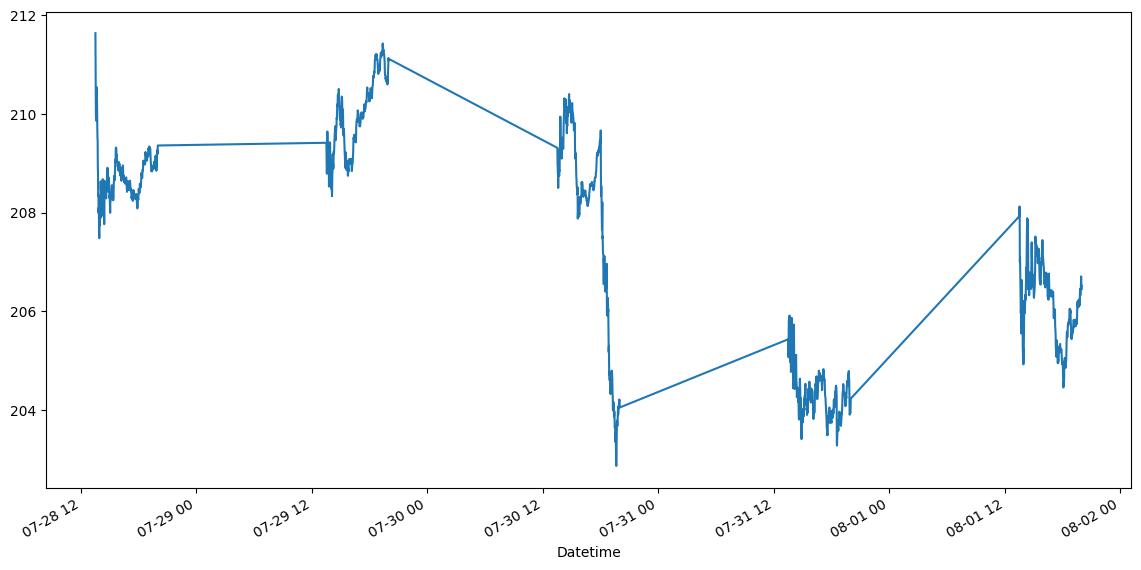

In [6]:
import yfinance as yf
from ta import add_all_ta_features
import matplotlib.pyplot as plt

data = yf.download('^XAU',interval="1m", period="max")
# swap multilevel index
data = data.swaplevel(axis=1)
data = data["^XAU"]
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data = data.ffill().bfill().fillna(0)
data['Close'].plot(figsize=(14, 7))


In [7]:
import numpy as np

# Initialize signal column with zeros
data['signal'] = 0

def nearest_slot(ts, slots):
    # Find the slot in slots that is closest to ts
    return slots[np.argmin(np.abs(slots - ts))]

for idx, row in df.iterrows():
    if row['Action'] in ['Buy', 'Sell'] and pd.notnull(row['Open Date']) and pd.notnull(row['Close Date']):
        open_dt = pd.to_datetime(row['Open Date'], utc=True)
        close_dt = pd.to_datetime(row['Close Date'], utc=True)
        # Find nearest slot in data.index
        open_slot = nearest_slot(open_dt, data.index)
        close_slot = nearest_slot(close_dt, data.index)
        if row['Action'] == 'Buy':
            data.at[open_slot, 'signal'] = 1
            data.at[close_slot, 'signal'] = -1
        elif row['Action'] == 'Sell':
            data.at[open_slot, 'signal'] = -1
            data.at[close_slot, 'signal'] = 1

data["signal"].value_counts()

signal
 0    1927
 1       5
-1       3
Name: count, dtype: int64

## now that we have signal try to correlate

<Axes: title={'center': 'Trading Signals'}, xlabel='Datetime'>

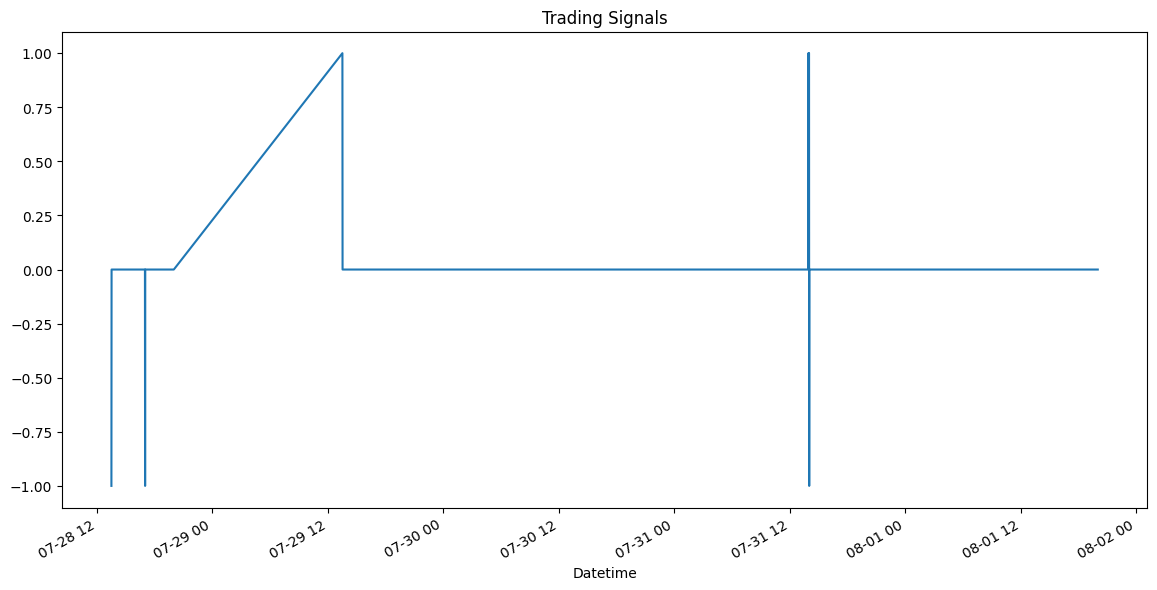

In [8]:
data["signal"].plot(figsize=(14, 7), title="Trading Signals")

## adapt signal

i want to have it at either -1 or 1 depending on the last value until the other appears


<Axes: title={'center': 'Adapted Trading Signal'}, xlabel='Datetime'>

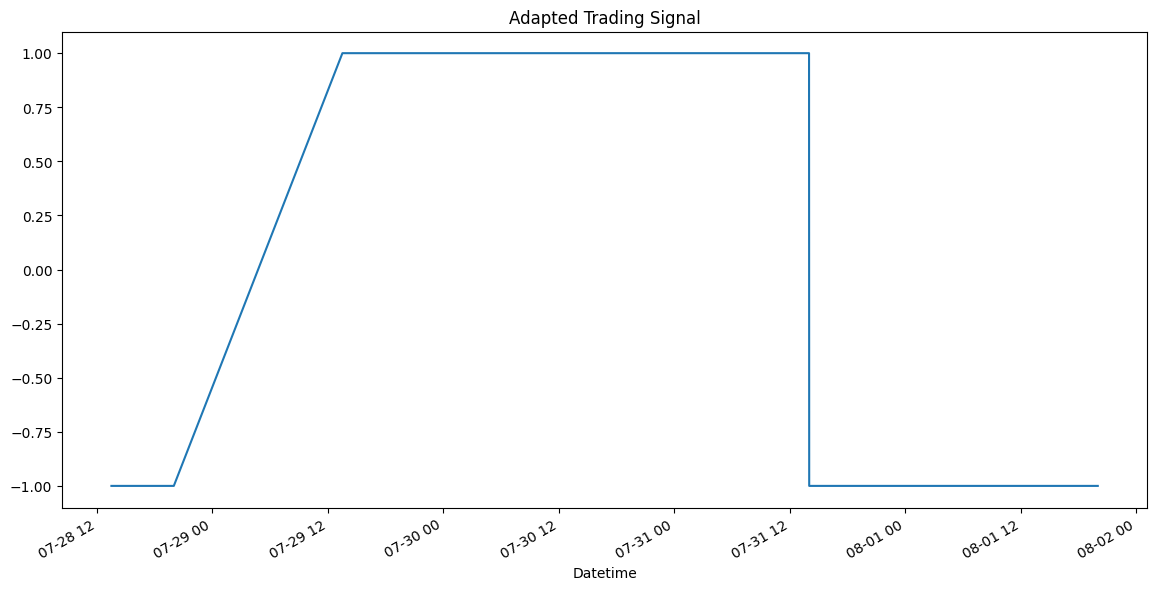

In [9]:
# Adapt signal: fill forward with last non-zero value, then map to -1 or 1
def adapt_signal(series):
    # Replace zeros with NaN, then forward fill
    s = series.replace(0, np.nan).ffill()
    # If still NaN (at start), fill with first non-zero value
    first_nonzero = s.dropna().iloc[0] if not s.dropna().empty else 1
    s = s.fillna(first_nonzero)
    # Map all non-negative to 1, negative to -1
    return np.where(s < 0, -1, 1)

data["adapted_signal"] = adapt_signal(data["signal"])
data["adapted_signal"].plot(figsize=(14, 7), title="Adapted Trading Signal")

## clean signal

if a lot of changes between 1 and -1 are close to another, ignore them to "smoothen" the signal

<Axes: title={'center': 'Cleaned Trading Signal'}, xlabel='Datetime'>

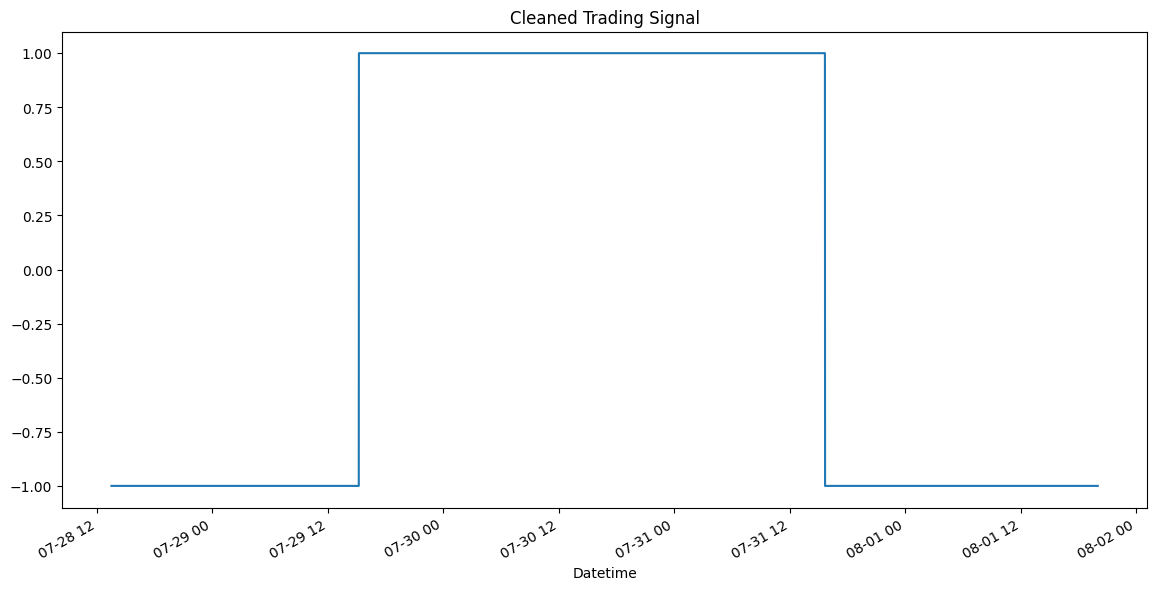

In [10]:
def smooth_signal(signal, min_interval=5):
    smoothed = signal.copy()
    current_value = smoothed.iloc[0]
    pending_value = current_value
    count = 0
    for i in range(1, len(smoothed)):
        if smoothed.iloc[i] != current_value:
            if smoothed.iloc[i] == pending_value:
                count += 1
            else:
                pending_value = smoothed.iloc[i]
                count = 1
            if count >= min_interval:
                current_value = pending_value
                count = 0
        else:
            count = 0
            pending_value = current_value
        smoothed.iloc[i] = current_value
    return smoothed

data["signal"] = smooth_signal(data["adapted_signal"], min_interval=100)
data["signal"].plot(figsize=(14, 7), title="Cleaned Trading Signal")


### finetune signal smoothing

In [11]:
def tradeMetric(trades):
    return np.median(trades) * len(trades) / 100

In [12]:

def oneRun(signalthreshold = 100, startMoney = 10000, signalcolumnname="signal"):
    money = startMoney
    nrStocks = 0
    portfolio = []
    buyHold = []
    boughtAt = 0
    trades = []

    data[signalcolumnname] = smooth_signal(data["adapted_signal"], min_interval=signalthreshold)

    for i in range(len(data)):
        if data[signalcolumnname].iloc[i] == 1 and money > 0:
            # Buy signal
            nrStocks += money / data["Close"].iloc[i]
            money = 0
            boughtAt = data["Close"].iloc[i]
        elif data[signalcolumnname].iloc[i] == -1 and nrStocks > 0:
            # Sell signal
            money += nrStocks * data["Close"].iloc[i]
            nrStocks = 0
            win = data["Close"].iloc[i] - boughtAt
            trades.append(win)
        portfolio.append(money + nrStocks * data["Close"].iloc[i])
        buyHold.append(data["Close"].iloc[i] * startMoney / data["Close"].iloc[0])
    myTradeMetric = tradeMetric(trades)
    return portfolio, buyHold, trades, myTradeMetric

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=100)
# build a metric which favors high median trades, but also rewards if there are many trades more
print("Final portfolio value:", portfolio[-1])
print("Final buy and hold value:", buyHold[-1])
print("median trade win:", np.median(trades))
print("myTradeMetric:", myTradeMetric)
print("win over buyhold:", portfolio[-1] - buyHold[-1])

Final portfolio value: 9726.447601615386
Final buy and hold value: 9755.084834175606
median trade win: -5.7467041015625
myTradeMetric: -0.057467041015625
win over buyhold: -28.637232560220582


In [13]:
from random import randint
from tqdm import tqdm
bestWinOverBuyHold = -1000000
bestTradeMetric = -1000000
bestSettings = dict()

allSims = []

for signalthreshold in tqdm([1,5,8,10, 50, 100, 200, 500] + [randint(1, 1000) for _ in range(100)]):
    portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalthreshold)

    allSims.append({
        "signalthreshold": signalthreshold,
        "finalPortfolio": portfolio[-1],
        "finalBuyHold": buyHold[-1],
        "medianTrade": np.median(trades) if trades else 0,
        "myTradeMetric": myTradeMetric,
        "winOverBuyHold": portfolio[-1] - buyHold[-1],
        "nrTrades": len(trades),
    })

    winOverBuyHold = portfolio[-1] - buyHold[-1]
    if myTradeMetric > bestTradeMetric:
        bestTradeMetric = myTradeMetric
        bestSettings = allSims[-1]
print("Best win over buy and hold:", bestTradeMetric)
print("Best settings:", bestSettings) # 575

allSims = pd.DataFrame(allSims)



  9%|▉         | 10/108 [00:00<00:05, 19.20it/s]/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 108/108 [00:05<00:00, 19.01it/s]

Best win over buy and hold: 0.02137298583984375
Best settings: {'signalthreshold': 734, 'finalPortfolio': np.float64(10104.684713812081), 'finalBuyHold': np.float64(9755.084834175606), 'medianTrade': np.float64(2.137298583984375), 'myTradeMetric': np.float64(0.02137298583984375), 'winOverBuyHold': np.float64(349.5998796364747), 'nrTrades': 1}


best finalPortfolio: 449, 3 trades
best medianTrade with at least 5 trades: 267, 5 trades, winOverBuyHold 51
best myTradeMetric: 5, win over buyhold 71, 25 trades, 10247 usd 
best signalthres 1 performs good as well, 71 winoverbuyhold, 25 trades 

In [31]:
allSims = allSims.sort_values(by="winOverBuyHold", ascending=False)
allSims.head(10)

,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
106,766,10119.034754,9755.084834,0.000000,NaN,363.949919,0
57,773,10114.072636,9755.084834,0.000000,NaN,358.987802,0
101,770,10109.709090,9755.084834,0.000000,NaN,354.624256,0
27,734,10104.684714,9755.084834,2.137299,0.021373,349.599880,1
48,718,10081.046387,9755.084834,1.657196,0.016572,325.961553,1
70,802,10078.045632,9755.084834,0.000000,NaN,322.960798,0
105,719,10075.079976,9755.084834,1.536209,0.015362,319.995142,1
102,716,10072.120472,9755.084834,1.473602,0.014736,317.035638,1
49,708,10048.790261,9755.084834,0.998810,0.009988,293.705427,1
29,781,10032.972792,9755.084834,0.000000,NaN,277.887958,0


Text(0.5, 1.0, 'Final Portfolio Value vs Signal Threshold')

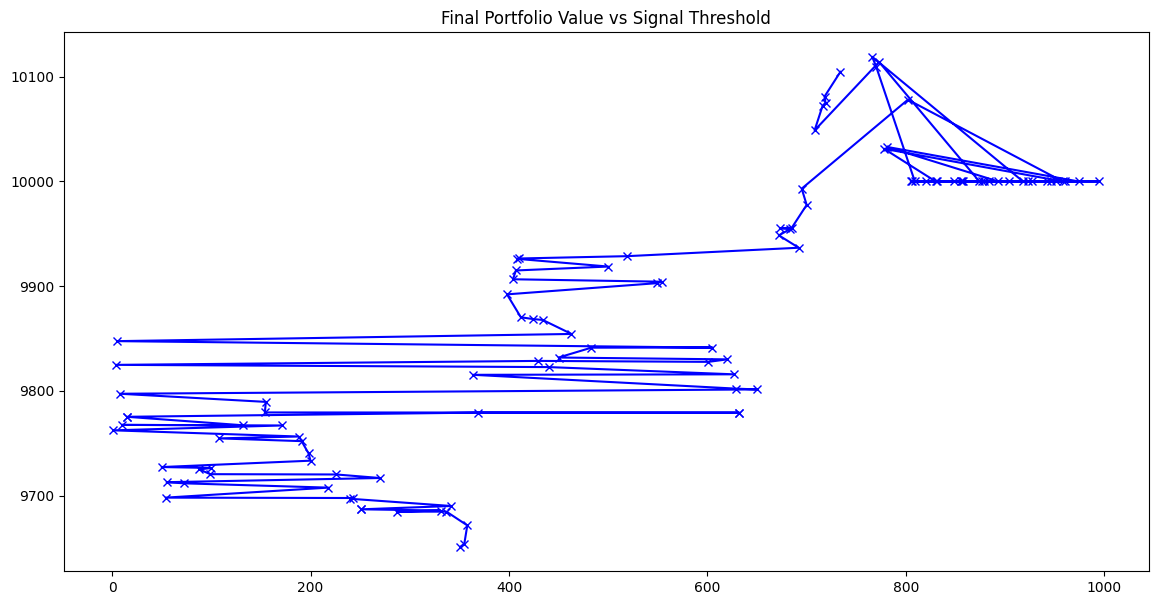

In [15]:
# plot signalthreshold x, finalPortfolio y
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(allSims['signalthreshold'], allSims['finalPortfolio'], marker='x', color='b')
plt.title('Final Portfolio Value vs Signal Threshold')

/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jguese/code/tradingbot25/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

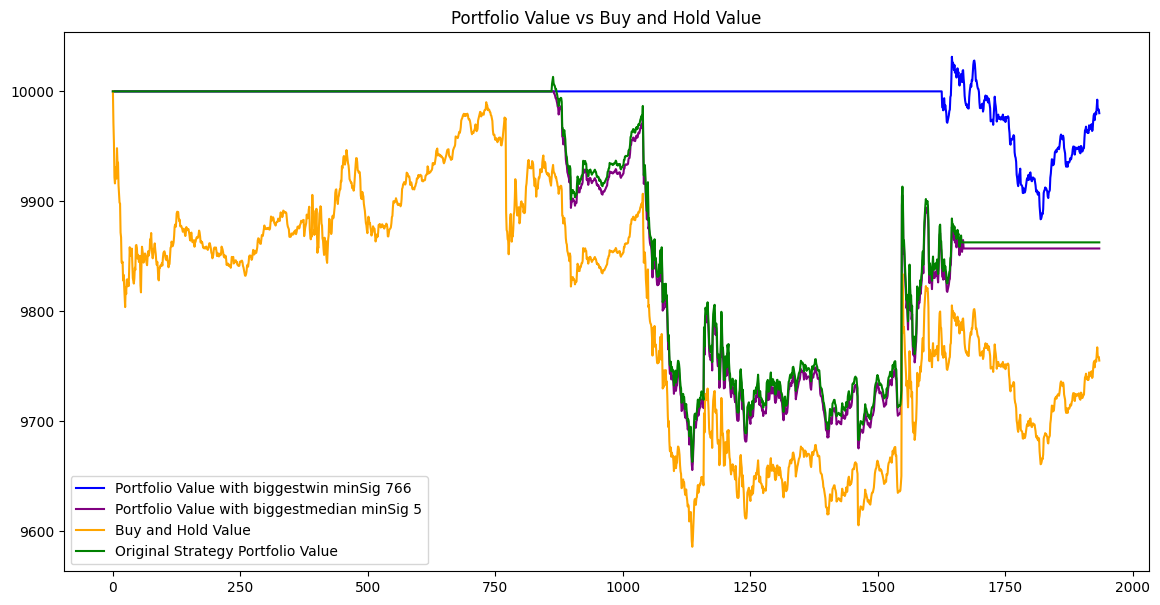

In [32]:
signalThresholdBiggestWin = 766 # 476 biggest win, 5 biggest median trades
signalThresholdBiggestMedianTrades = 5

portfolio, buyHold, trades, myTradeMetric = oneRun(signalthreshold=signalThresholdBiggestWin)
portfolioBiggestMedianTrades, buyHoldBiggestMedianTrades, tradesBiggestMedianTrades, myTradeMetricBiggestMedianTrades = oneRun(signalthreshold=signalThresholdBiggestMedianTrades)
portfolioOriginalStrategy, buyHoldOriginalStrategy, tradesOriginalStrategy, myTradeMetricOriginalStrategy = oneRun(signalthreshold=1)
plt.figure(figsize=(14, 7))
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

In [33]:
data["signal"] = smooth_signal(data["adapted_signal"], min_interval=476)

# correlations

In [34]:
# Correlation of 'signal' with all other columns
data = data.drop(["adapted_signal"], axis=1)

data.corr()["signal"].sort_values(ascending=False)

Price
signal                 1.000000
tree_signal            0.836569
momentum_ppo_signal    0.175867
trend_macd_signal      0.175267
momentum_ppo           0.164331
                         ...   
volume_mfi                  NaN
volume_nvi                  NaN
momentum_pvo                NaN
momentum_pvo_signal         NaN
momentum_pvo_hist           NaN
Name: signal, Length: 93, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

# Example: Use all columns except 'signal' as features, and 'signal' as target
# Map signal values to 0, 1, 2 for classifier compatibility
y_mapped = data['signal'].map({-1: 0, 1: 1})
X = data.drop(columns=['signal'])
y = y_mapped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
# Remove inf and -inf values from X_train and X_test
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Fill remaining NaNs with 0 (or use another strategy if preferred)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [36]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       264
           1       0.98      0.99      0.99       123

    accuracy                           0.99       387
   macro avg       0.99      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387

Accuracy: 0.9922480620155039


In [37]:
# Print top 10 feature importances
importances = clf.feature_importances_
feature_names = X_train.columns
top_indices = np.argsort(importances)[::-1][:10]
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

tree_signal: 0.7002
trend_visual_ichimoku_b: 0.1417
volatility_atr: 0.1172
volatility_dcl: 0.0317
volatility_ui: 0.0033
momentum_roc: 0.0029
volatility_kcp: 0.0015
trend_adx: 0.0015
volatility_kcl: 0.0000
volatility_kcw: 0.0000


## reduce tree size

In [38]:
for maxdepth in range(1, 11):
    for maxfeatures in range(1, 11):
        clf = DecisionTreeClassifier(max_depth=maxdepth, max_features=maxfeatures)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Max Depth: {maxdepth}, Max Features: {maxfeatures}")
        # print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("-" * 50)

# Preferred parameters: {'param_max_depth': 18, 'param_max_features': 19}
# Preferred accuracy: 0.9155456910299452

Max Depth: 1, Max Features: 1
Accuracy: 0.6821705426356589
--------------------------------------------------
Max Depth: 1, Max Features: 2
Accuracy: 0.8914728682170543
--------------------------------------------------
Max Depth: 1, Max Features: 3
Accuracy: 0.8914728682170543
--------------------------------------------------
Max Depth: 1, Max Features: 4
Accuracy: 0.8914728682170543
--------------------------------------------------
Max Depth: 1, Max Features: 5
Accuracy: 0.8992248062015504
--------------------------------------------------
Max Depth: 1, Max Features: 6
Accuracy: 0.9043927648578811
--------------------------------------------------
Max Depth: 1, Max Features: 7
Accuracy: 0.8914728682170543
--------------------------------------------------
Max Depth: 1, Max Features: 8
Accuracy: 0.9043927648578811
--------------------------------------------------
Max Depth: 1, Max Features: 9
Accuracy: 0.9043927648578811
--------------------------------------------------
Max Depth:

In [39]:
clf = DecisionTreeClassifier(max_depth=5) #
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("-" * 50)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       264
           1       1.00      0.98      0.99       123

    accuracy                           0.99       387
   macro avg       1.00      0.99      0.99       387
weighted avg       0.99      0.99      0.99       387

Accuracy: 0.9948320413436692
--------------------------------------------------


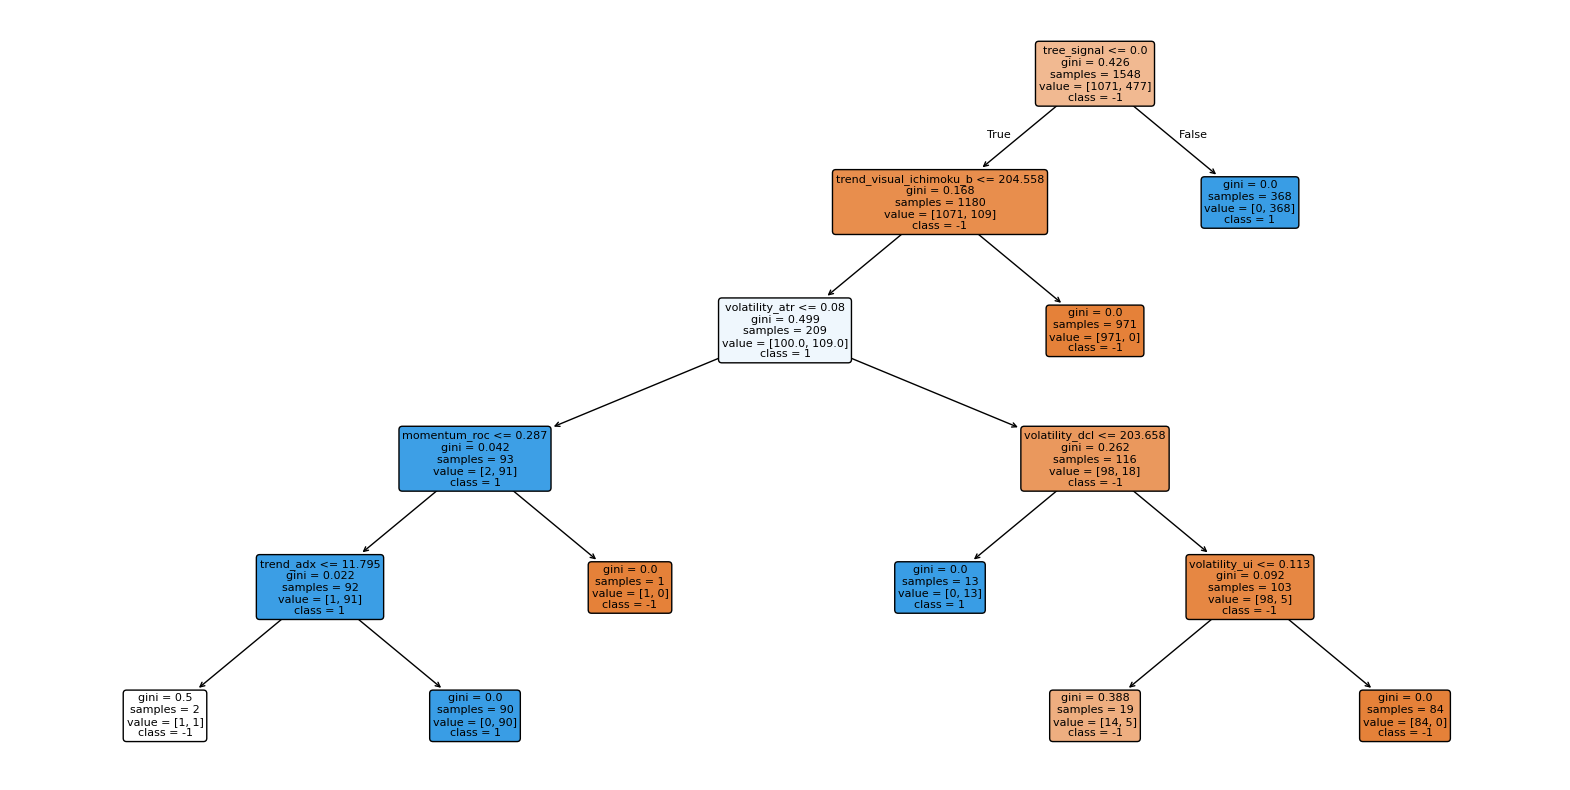

In [40]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=['-1', '1'], filled=True, rounded=True, fontsize=8)
plt.show()

In [41]:
from sklearn.tree import export_text

# Export the decision tree as a set of if-else rules
tree_rules = export_text(clf, feature_names=list(feature_names))
print(tree_rules)

|--- tree_signal <= 0.00
|   |--- trend_visual_ichimoku_b <= 204.56
|   |   |--- volatility_atr <= 0.08
|   |   |   |--- momentum_roc <= 0.29
|   |   |   |   |--- trend_adx <= 11.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- trend_adx >  11.80
|   |   |   |   |   |--- class: 1
|   |   |   |--- momentum_roc >  0.29
|   |   |   |   |--- class: 0
|   |   |--- volatility_atr >  0.08
|   |   |   |--- volatility_dcl <= 203.66
|   |   |   |   |--- class: 1
|   |   |   |--- volatility_dcl >  203.66
|   |   |   |   |--- volatility_ui <= 0.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- volatility_ui >  0.11
|   |   |   |   |   |--- class: 0
|   |--- trend_visual_ichimoku_b >  204.56
|   |   |--- class: 0
|--- tree_signal >  0.00
|   |--- class: 1



In [42]:
def tree_decision(row):
    if row['trend_sma_slow'] <= 1.16:
        if row['trend_macd_signal'] <= -0.00:
            return -1
        else:  # trend_macd_signal > -0.00
            if row['volatility_bbh'] <= 1.15:
                if row['trend_visual_ichimoku_b'] <= 1.15:
                    # Both branches return 1 regardless of trend_kst_diff
                    return 1
                else:  # trend_visual_ichimoku_b > 1.15
                    if row['volatility_dcl'] <= 1.15:
                        return -1
                    else:
                        return 1
            else:  # volatility_bbh > 1.15
                return 1
    else:  # trend_sma_slow > 1.16
        return -1

In [51]:
def tree_decisionnew(row):
    if row['trend_visual_ichimoku_b'] <= 204.56:
        if row['volatility_atr'] <= 0.08:
            if row['momentum_roc'] <= 0.29:
                if row['trend_adx'] <= 11.80:
                    return -1
                else:
                    return 1
            else:
                return -1
        else:
            if row['volatility_dcl'] <= 203.66:
                return 1
            else:
                return -1
    else:
        return -1
  

In [52]:
data["tree_signal"] = data.apply(tree_decision, axis=1)
data["tree_signal_2"] = data.apply(tree_decisionnew, axis=1)
data["adapted_signal"] = adapt_signal(data["signal"])

In [44]:
data["tree_signal"].value_counts()

tree_signal
-1    1935
Name: count, dtype: int64

Text(0.5, 1.0, 'Portfolio Value vs Buy and Hold Value')

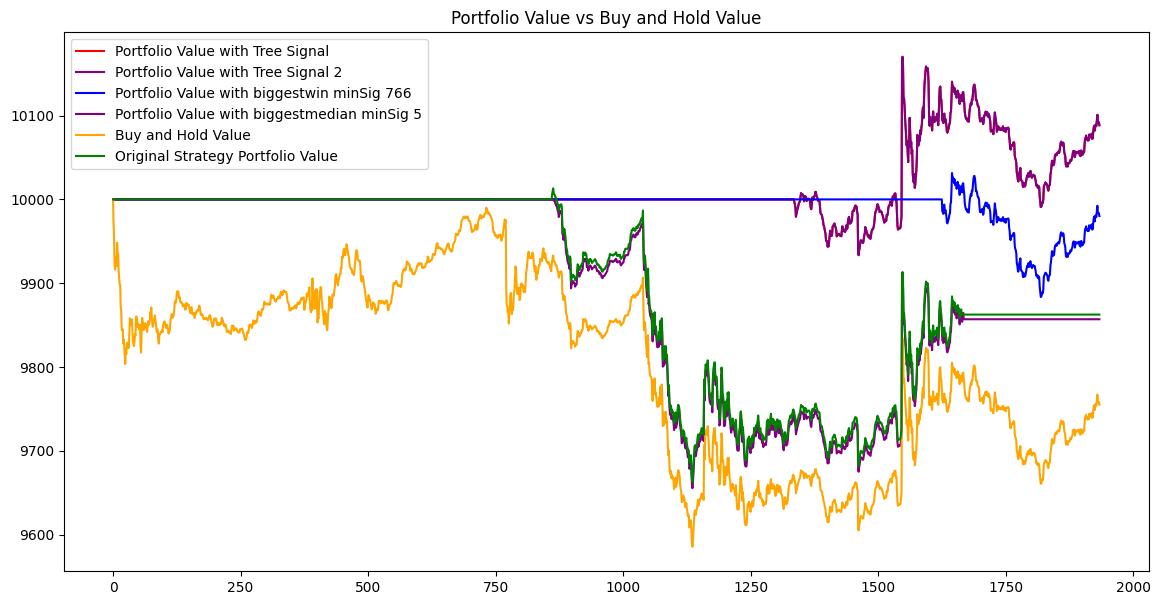

In [53]:
portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=1, signalcolumnname="tree_signal")
portfolioTree2, buyHoldTree2, tradesTree2, myTradeMetricTree2 = oneRun(signalthreshold=1, signalcolumnname="tree_signal_2")

plt.figure(figsize=(14, 7))
plt.plot(portfolioTree, label='Portfolio Value with Tree Signal', color='red')
plt.plot(portfolioTree2, label='Portfolio Value with Tree Signal 2', color='purple' )
plt.plot(portfolio, label='Portfolio Value with biggestwin minSig ' + str(signalThresholdBiggestWin), color='blue')
plt.plot(portfolioBiggestMedianTrades, label='Portfolio Value with biggestmedian minSig ' + str(signalThresholdBiggestMedianTrades), color='purple')
plt.plot(buyHold, label='Buy and Hold Value', color='orange')
plt.plot(portfolioOriginalStrategy, label='Original Strategy Portfolio Value', color='green')
plt.legend()
plt.title('Portfolio Value vs Buy and Hold Value')

meaning i have successfully backtracked which values they are using and even improved on it...

### finetuning my tree signal

In [46]:
allResults = []

for i in tqdm([1,5,10,100,200,300] + [randint(1, 1000) for _ in range(100)]):
    portfolioTree, buyHoldTree, tradesTree, myTradeMetricTree = oneRun(signalthreshold=i, signalcolumnname="tree_signal")
    allResults.append({
        "signalthreshold": i,
        "finalPortfolio": portfolioTree[-1],
        "finalBuyHold": buyHoldTree[-1],
        "medianTrade": np.median(tradesTree) if tradesTree else 0,
        "myTradeMetric": myTradeMetricTree,
        "winOverBuyHold": portfolioTree[-1] - buyHoldTree[-1],
        "nrTrades": len(tradesTree),
    })

allResults = pd.DataFrame(allResults)
allResults = allResults.sort_values(by="winOverBuyHold", ascending=False)
allResults.head(10)

100%|██████████| 106/106 [00:05<00:00, 19.39it/s]


,signalthreshold,finalPortfolio,finalBuyHold,medianTrade,myTradeMetric,winOverBuyHold,nrTrades
25,130,10147.124390,9755.084834,0,NaN,392.039556,0
101,69,10145.454273,9755.084834,0,NaN,390.369439,0
70,133,10138.230029,9755.084834,0,NaN,383.145195,0
73,149,10135.029810,9755.084834,0,NaN,379.944975,0
3,100,10126.077055,9755.084834,0,NaN,370.992221,0
21,157,10122.011333,9755.084834,0,NaN,366.926499,0
12,113,10116.629485,9755.084834,0,NaN,361.544651,0
28,159,10113.972839,9755.084834,0,NaN,358.888005,0
40,177,10112.744432,9755.084834,0,NaN,357.659598,0
41,177,10112.744432,9755.084834,0,NaN,357.659598,0
